In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os

#Load the .csv file
folder = 'C:\\Users\\Ashle\\OneDrive\\Desktop\\Lab codes\\2025 data\\time controls'

#Read CSV file
files = glob.glob(os.path.join(folder, "2507* time control.csv"))
#print("Files found:", files)

for file in files:
    data = pd.read_csv(file) #reads the file
    print(f"\n--- {os.path.basename(file)} ---")
    print(data)


--- 250716 time control.csv ---
          Time     0 TI     1 TE   2 TTot      3 VT     4 Max
0    2662.6774  0.65803  3.47160  4.12963  0.148833  0.402292
1    2666.8070  0.69627  5.51572  6.21199  0.150091  0.409752
2    2673.0190  0.68389  2.57762  3.26151  0.167150  0.427220
3    2676.2805  0.69365  4.98781  5.68146  0.136941  0.344988
4    2681.9620  0.67878  3.84262  4.52140  0.150894  0.347563
..         ...      ...      ...      ...       ...       ...
744  5849.1213  0.55003  3.41218  3.96221  0.093452  0.290498
745  5853.0835  0.57591  2.02969  2.60560  0.091467  0.227959
746  5855.6891  0.55204  3.05642  3.60846  0.094514  0.308805
747  5859.2976  0.51849  2.98621  3.50470  0.079645  0.229157
748  5862.8023  0.53245  3.13293  3.66538  0.082546  0.244325

[749 rows x 6 columns]

--- 250717 time control.csv ---
           Time     0 TI     1 TE   2 TTot      3 VT     4 Max
0     3015.6252  0.52612  3.17882  3.70494  0.004507  0.010831
1     3019.3301  0.55386  3.65676  4.210

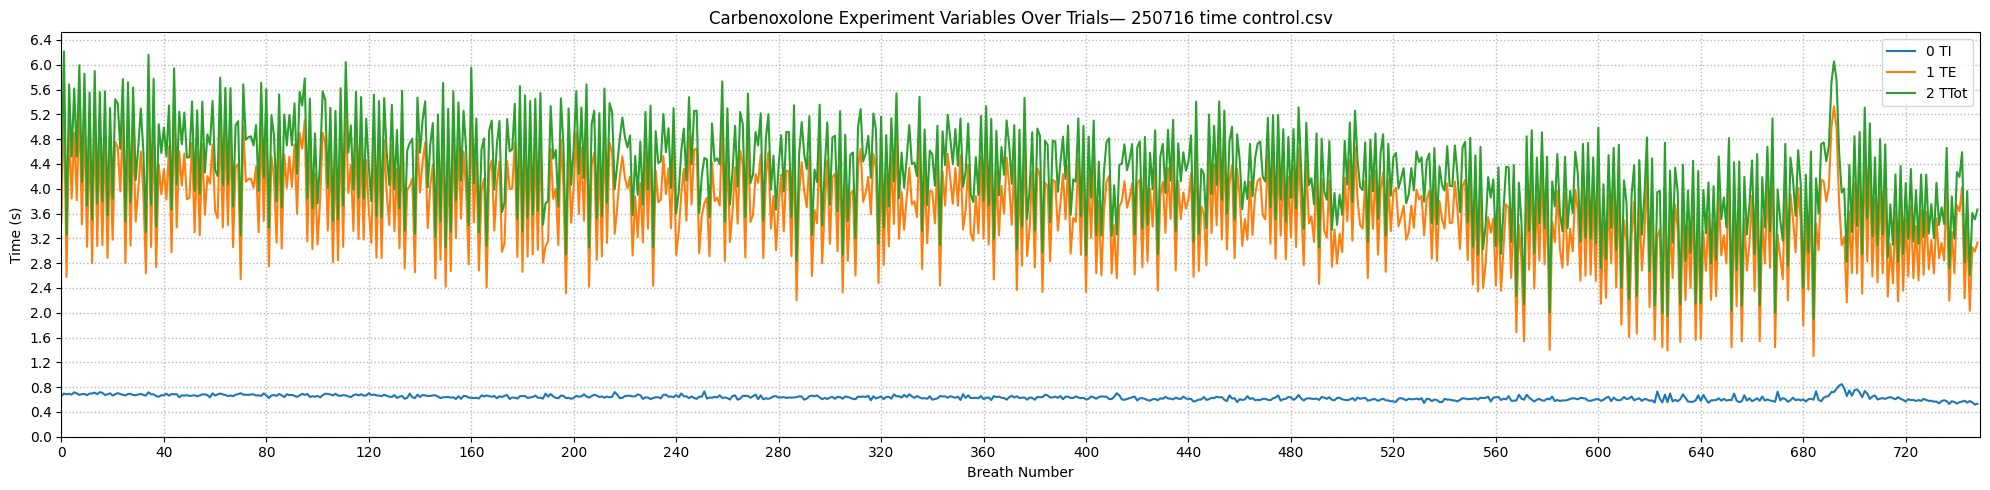

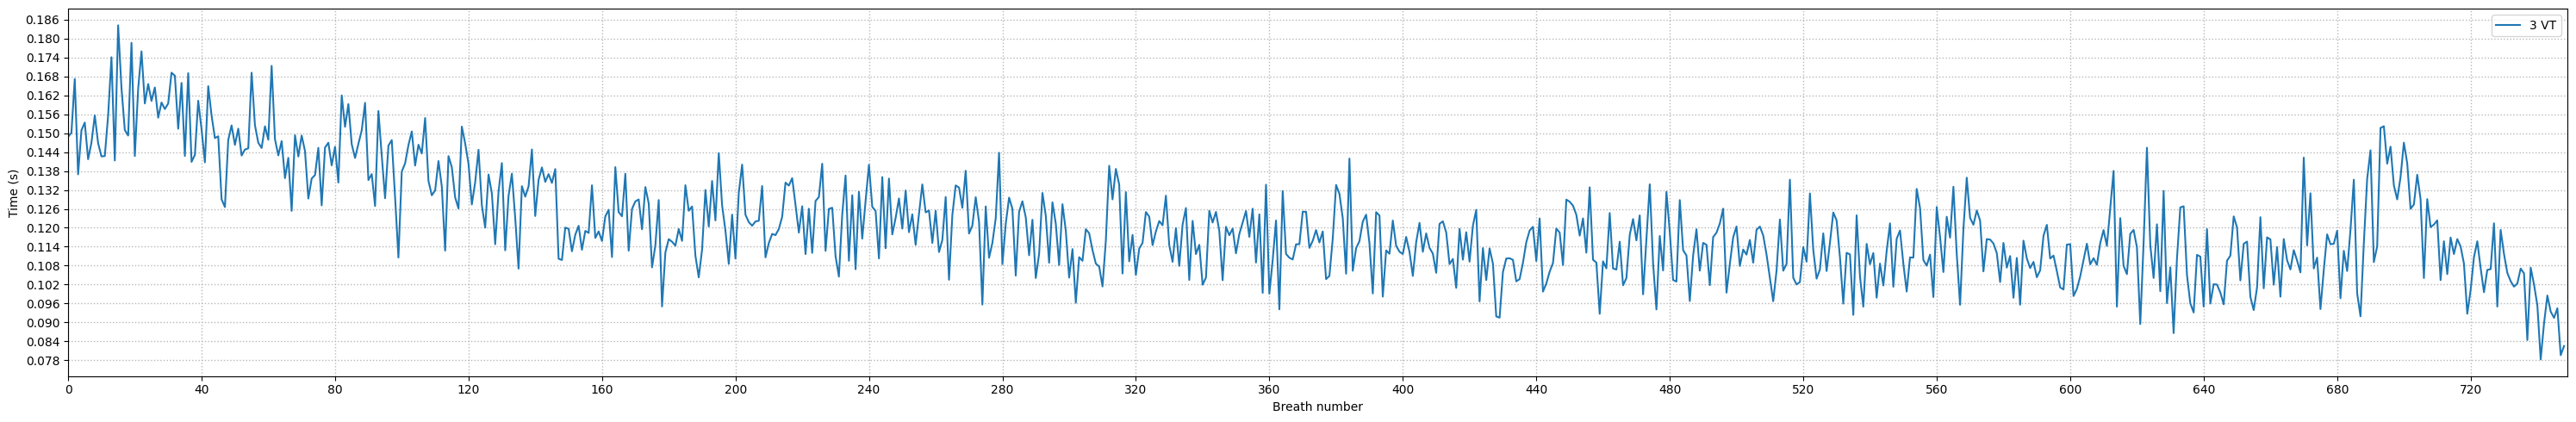

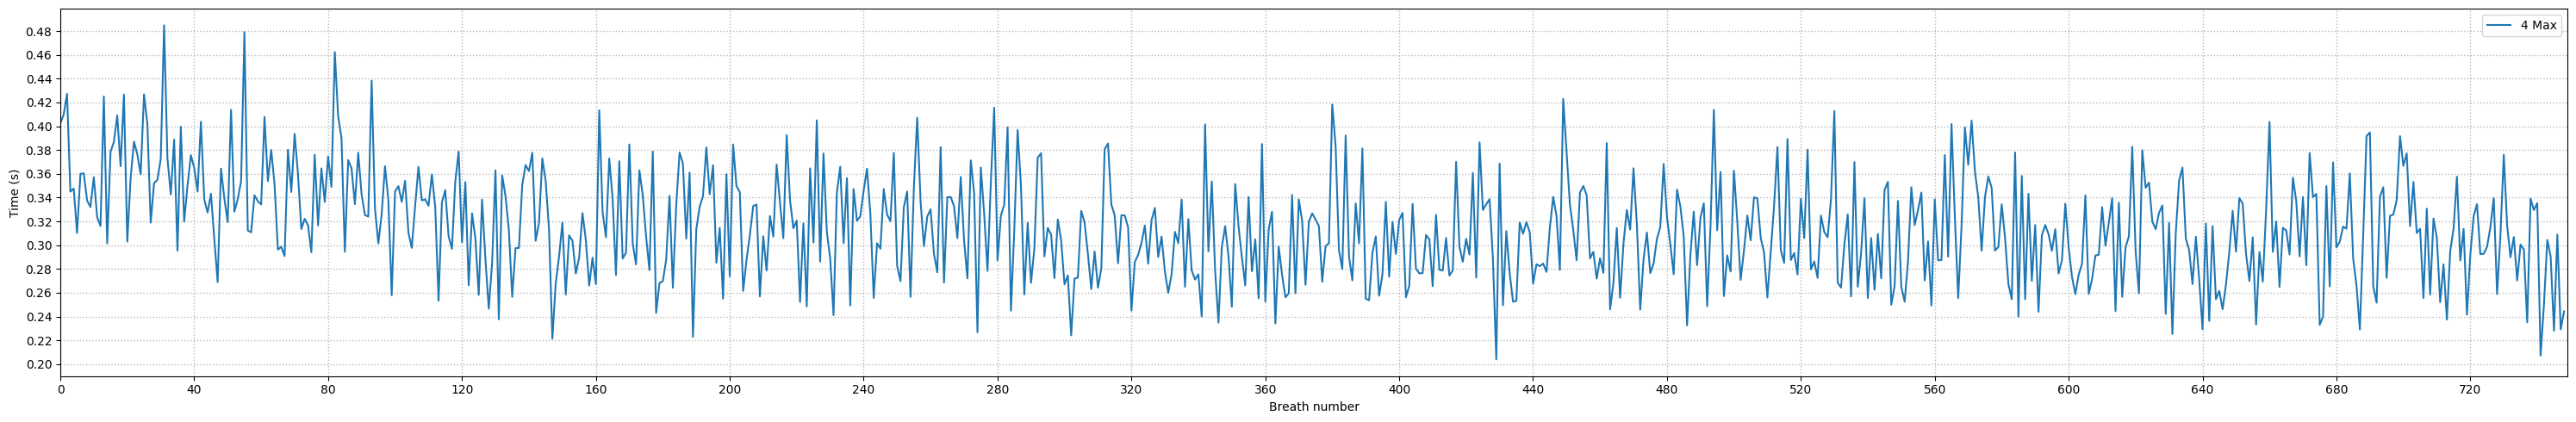

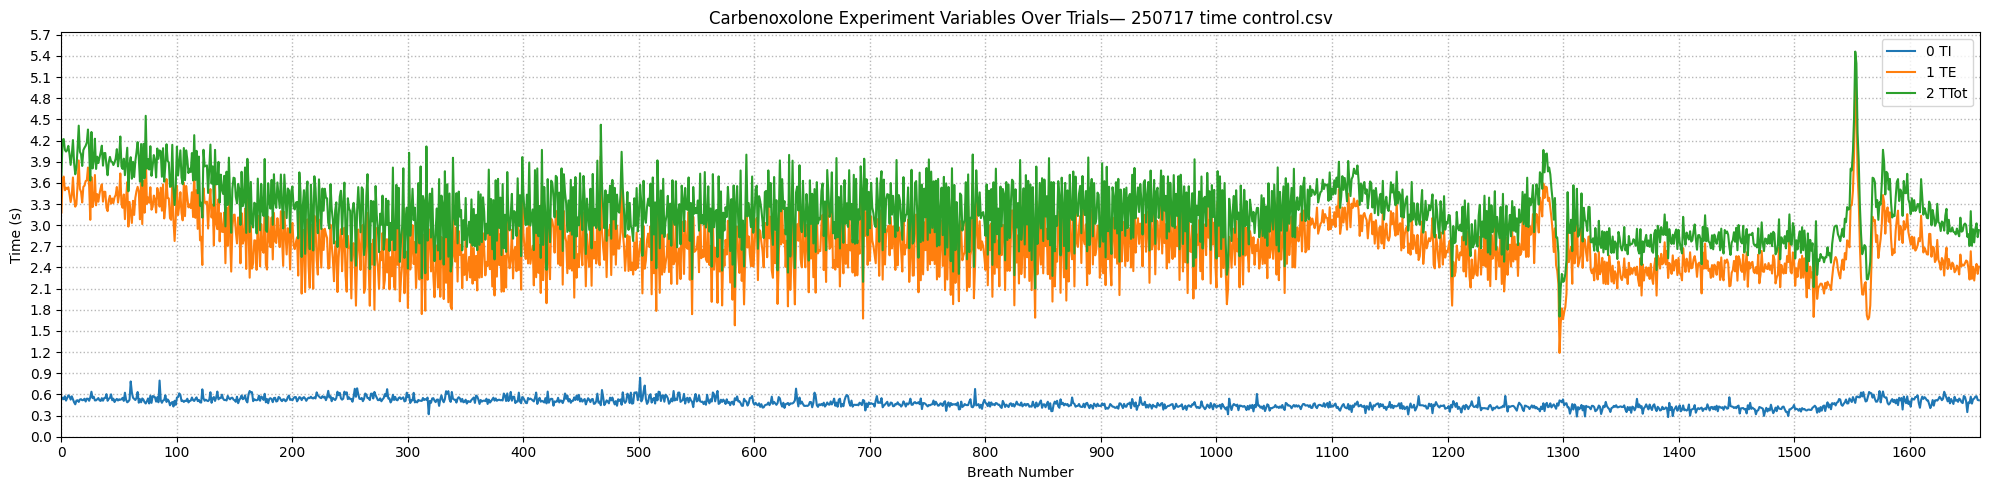

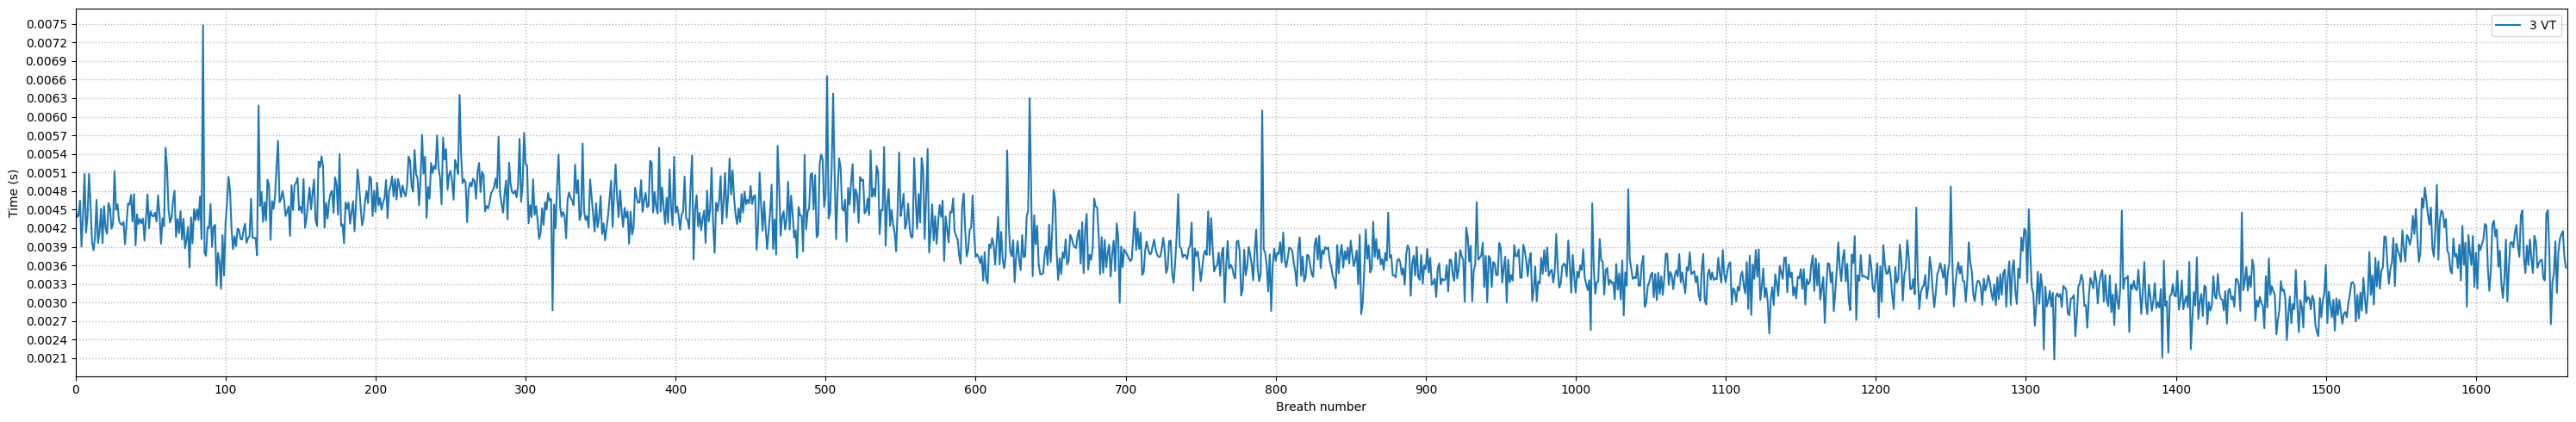

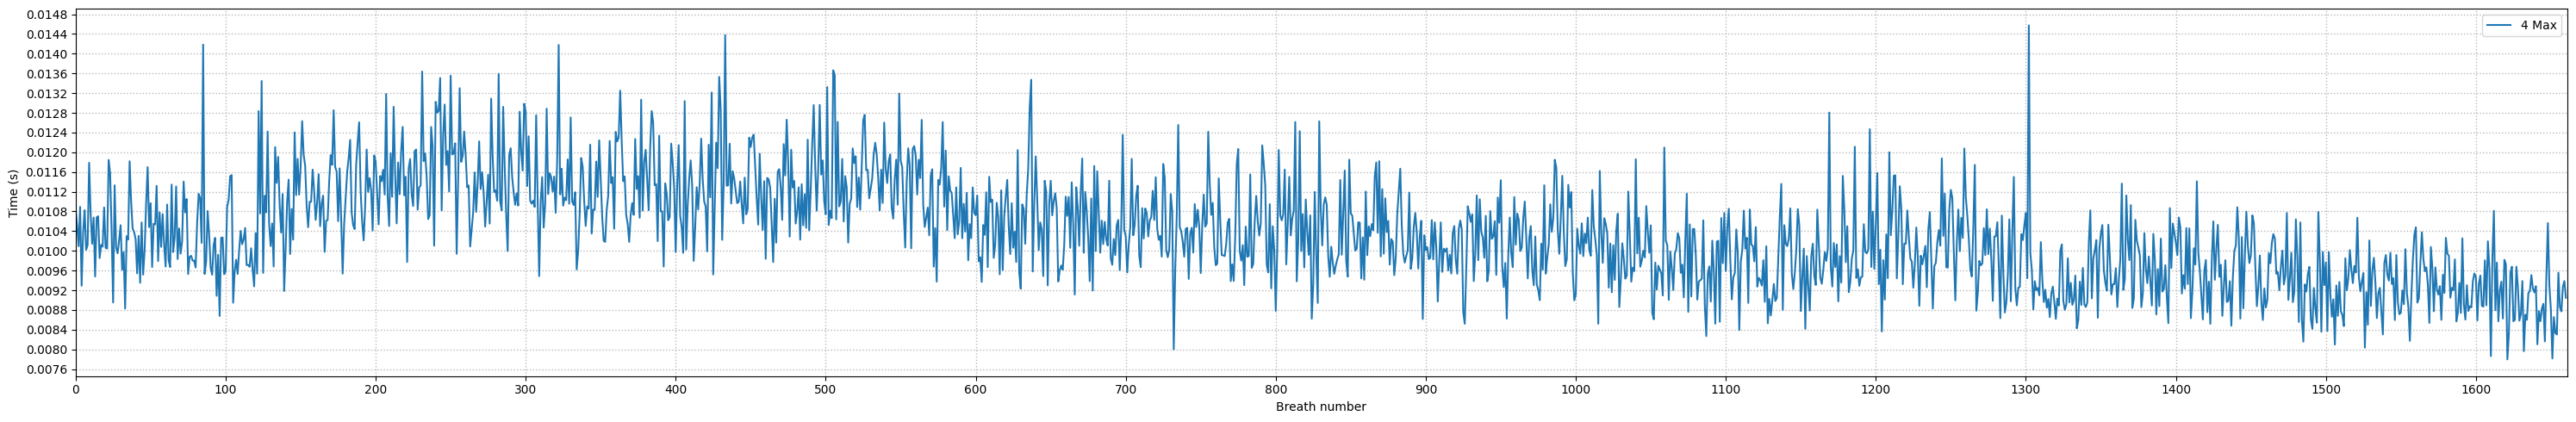

In [43]:
#should x axis be time or breath
for file in files:
    data = pd.read_csv(file)
    group1 = ['0 TI', '1 TE', '2 TTot']
    group2 = ['3 VT', '4 Max']
    
    xlim = len(data)  # set x-axis limit variable
    x = range(xlim) #x axis range

    plt.figure(figsize=(20, 5)) #figure size
    for var in group1:
        plt.plot(x, data[var], label=var)

    plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)  # style
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.yaxis.set_major_locator(plt.MaxNLocator(20))
    plt.xlim([0,xlim]) # set x-axis limit    
    plt.ylim(0, max(data[group1].max())*1.05)  # set y-axis limit
    plt.xlabel('Breath Number')
    plt.ylabel('Time (s)')  # all variables are in seconds
    plt.title(f'Carbenoxolone Experiment Variables Over Trials— {os.path.basename(file)}')
    plt.legend() 
    plt.tight_layout()
    plt.show()



    for var in group2:
        plt.figure(figsize=(30, 5)) #figure size
        plt.plot(x, data[var], label=var)
        plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)  # style
        ax = plt.gca()
        ax.xaxis.set_major_locator(plt.MaxNLocator(20))
        ax.yaxis.set_major_locator(plt.MaxNLocator(20))
        plt.xlim([0,xlim]) # set x-axis limit
        #plt.ylim(0, max(data[group2].max())*1.05)  # set y-axis limit
        plt.xlabel('Breath number')
        plt.ylabel('Time (s)')  # all variables are in seconds
        plt.legend() 
        plt.tight_layout()
        plt.show()

Normalized Mean % Change from Baseline:

0 TI: -7.68% change from baseline
1 TE: -12.98% change from baseline
2 TTot: -12.23% change from baseline
3 VT: -22.45% change from baseline
4 Max: -13.18% change from baseline


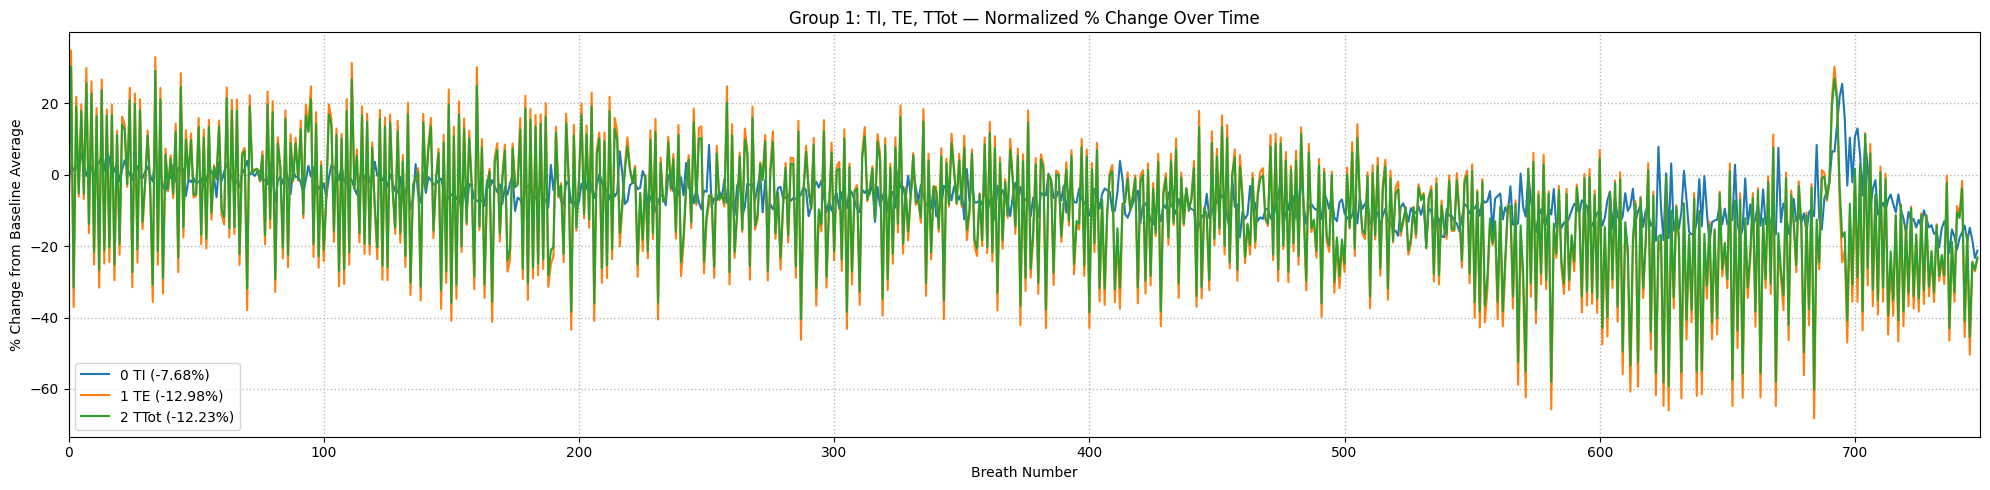

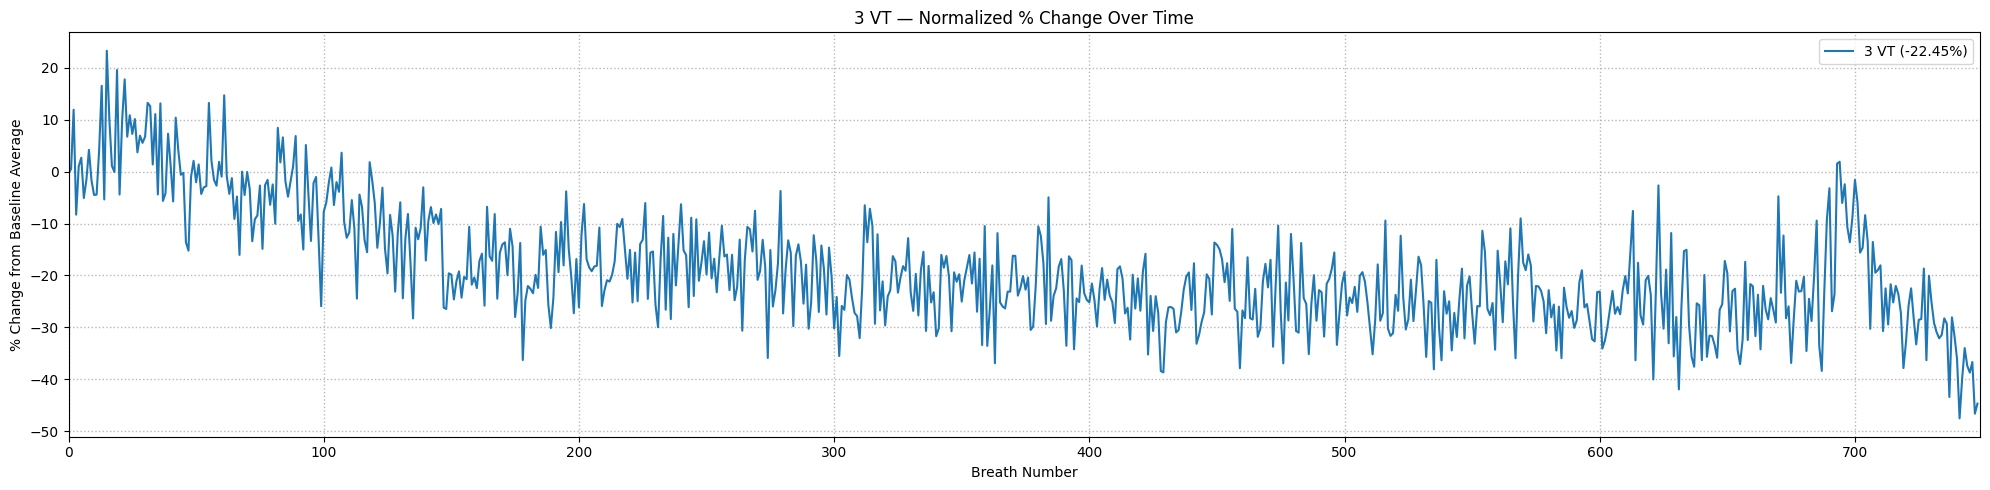

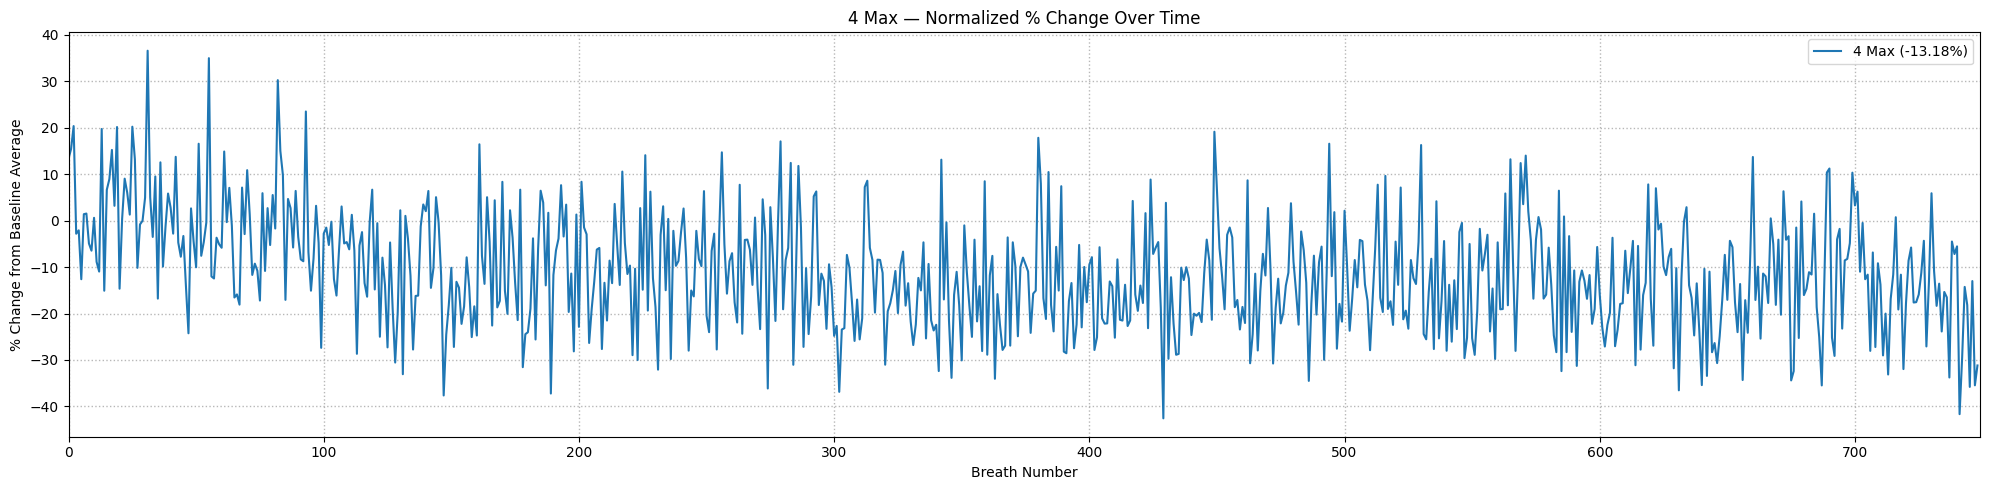

Normalized Mean % Change from Baseline:

0 TI: -11.28% change from baseline
1 TE: -21.37% change from baseline
2 TTot: -20.00% change from baseline
3 VT: -10.81% change from baseline
4 Max: 0.45% change from baseline


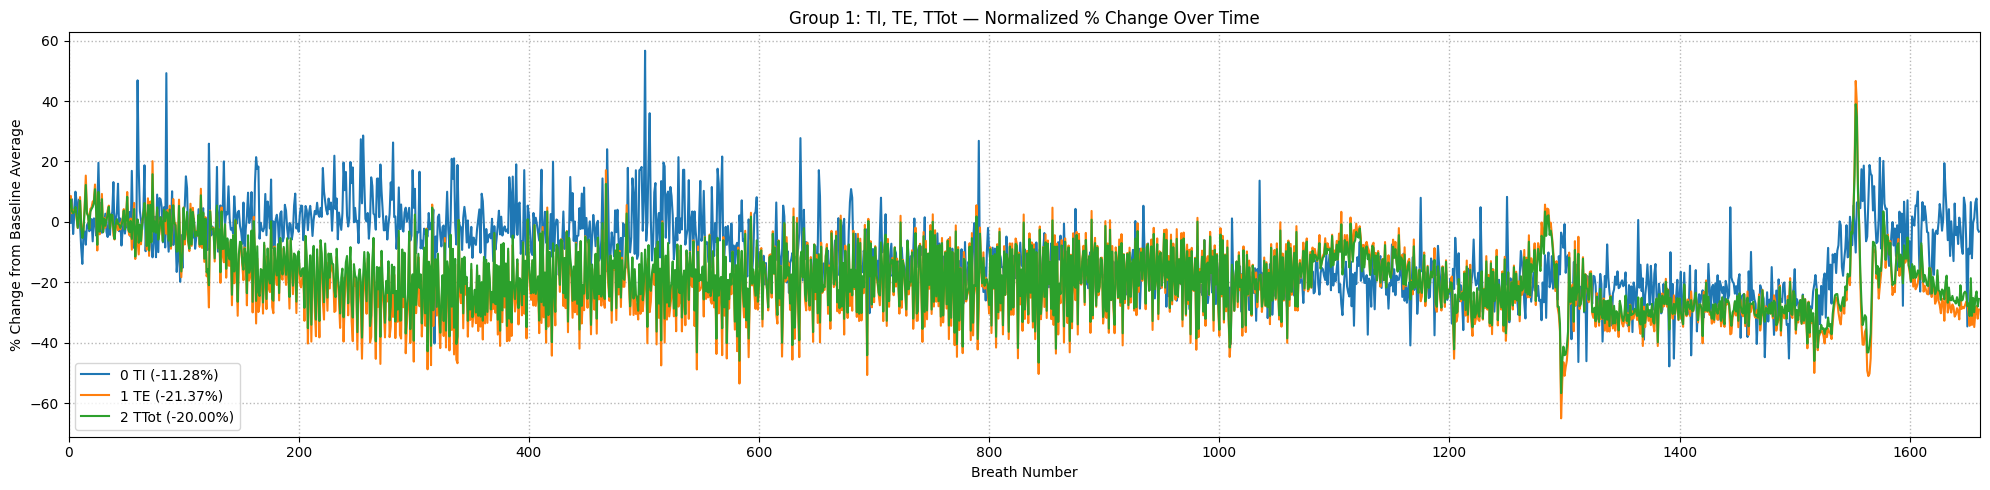

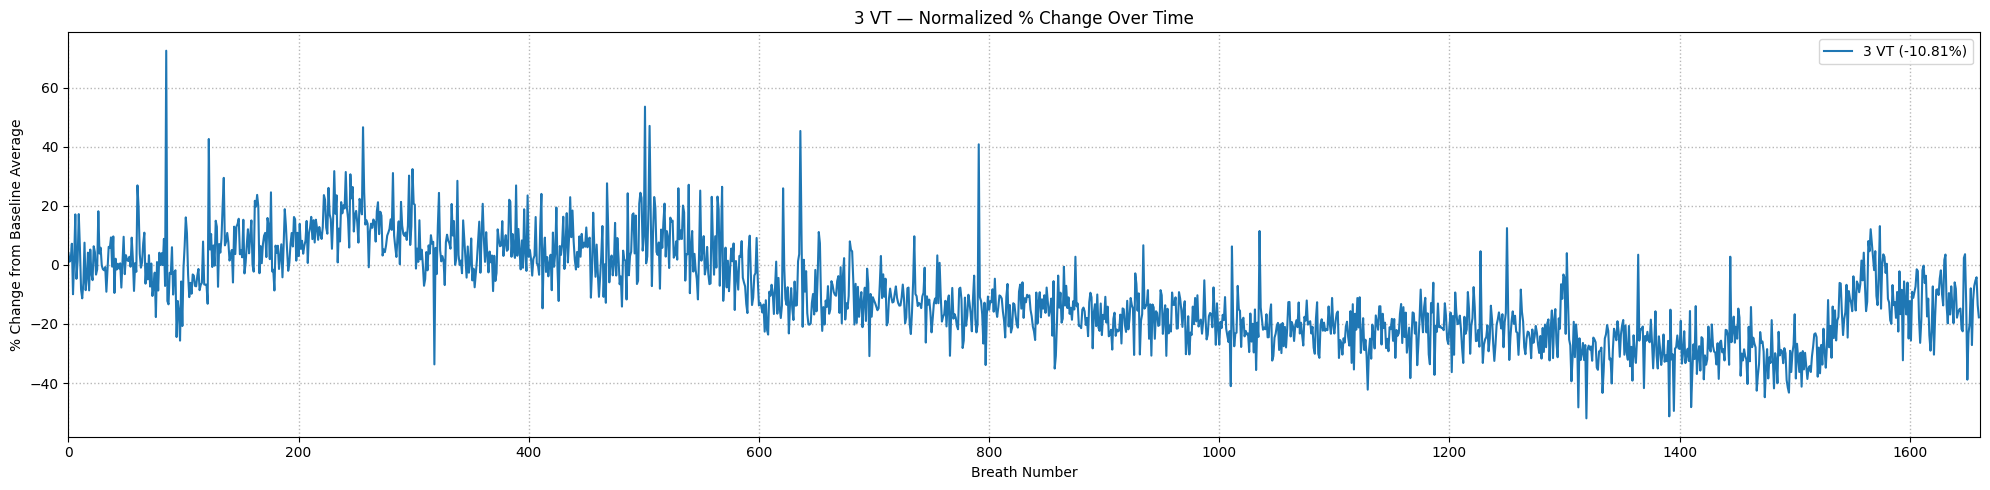

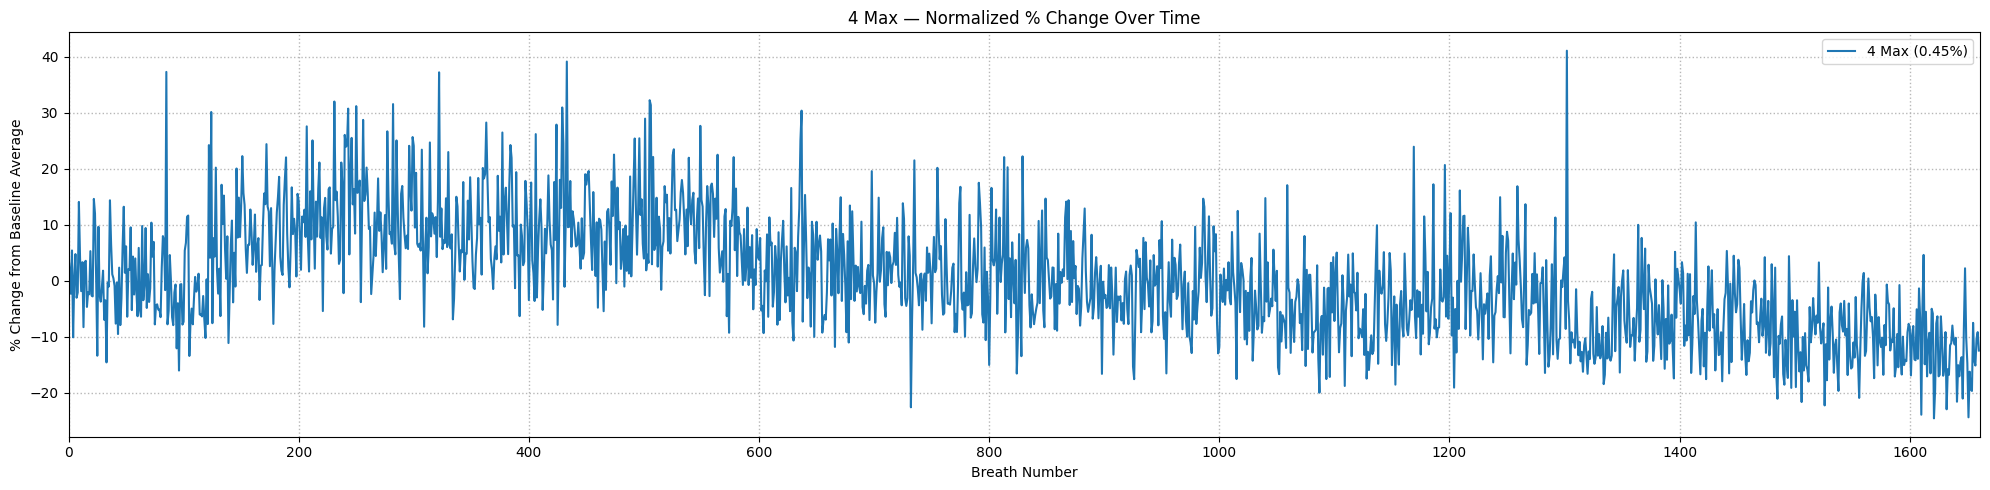

In [47]:
#Percent change from baseline (first 100 breaths) (normalized) for all variables
for file in files:
    
    data = pd.read_csv(file)
    xlim = len(data)  # set x-axis limit variable
    baseline_range = (0, 100) # breaths 0-100 is baseline, didn't include breats close to drug administration
    response_range = (124, xlim) # breaths 124-800 is post-drug


    normalized_data = data.copy()
    for var in group1 + group2:
        baseline_mean = data[var].iloc[baseline_range[0]:baseline_range[1]].mean()
        # Normalize so baseline = 0% (percent change)
        normalized_data[var] = ((data[var] - baseline_mean) / baseline_mean) * 100


    percent_changes = {}
    for var in group1 + group2:
        postdrug_mean = normalized_data[var].iloc[response_range[0]:response_range[1]].mean()
        percent_changes[var] = postdrug_mean

    #print out the percent changes
    print("Normalized Mean % Change from Baseline:\n")
    for var, change in percent_changes.items():
        print(f"{var}: {change:.2f}% change from baseline")

    #plot ti, te, ttot together
    x = range(len(data))
    plt.figure(figsize=(20, 5))
    for var in group1:
        plt.plot(x, normalized_data[var], label=f"{var} ({percent_changes[var]:.2f}%)")
    plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
    plt.xlim([0,xlim]) # set x-axis limit
    plt.xlabel('Breath Number')
    plt.ylabel('% Change from Baseline Average')
    plt.title('Group 1: TI, TE, TTot — Normalized % Change Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #plot vt and max separately
    for var in group2:
        plt.figure(figsize=(20, 5))
        plt.plot(x, normalized_data[var], label=f"{var} ({percent_changes[var]:.2f}%)")
        plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
        plt.xlim([0,xlim]) # set x-axis limit    
        plt.xlabel('Breath Number')
        plt.ylabel('% Change from Baseline Average')
        plt.title(f'{var} — Normalized % Change Over Time')
        plt.legend()
        plt.tight_layout()
        plt.show()



